<a href="https://colab.research.google.com/github/mithunkumarsr/LearnComputerVisionWithMithun/blob/main/CV_5_Edge_and_Line_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Notebook: Image Processing - Smoothing, Sharpening, Edge Detection, and Hough Transform

In [3]:


# Import Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Utility Function to Display Images
def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 10))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image, cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Load an Example Image
image_path = "image.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



# Section 1: Image Smoothing

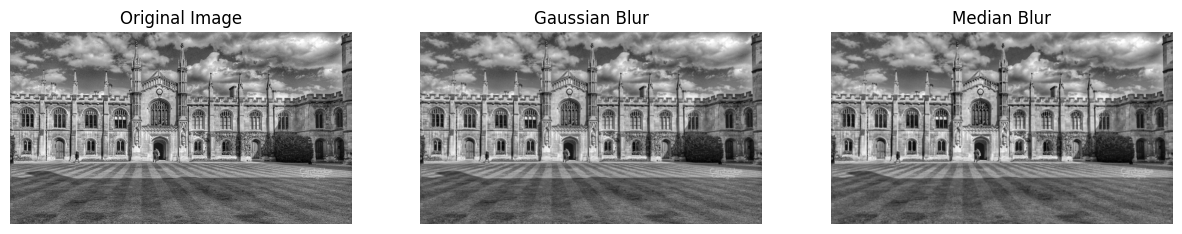

In [4]:

## Demo
# Apply Gaussian Blur and Median Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)

# Display Results
display_images([image, gaussian_blur, median_blur],
               ["Original Image", "Gaussian Blur", "Median Blur"])

## Exercise 1
# Task: Experiment with different kernel sizes for Gaussian and Median Blur
# Uncomment and modify the code below:
#gaussian_blur_custom = cv2.GaussianBlur(image, (?, ?), 0)
#median_blur_custom = cv2.medianBlur(image, ?)
#display_images([gaussian_blur_custom, median_blur_custom], ["Custom Gaussian Blur", "Custom Median Blur"])



# Section 2: Image Sharpening

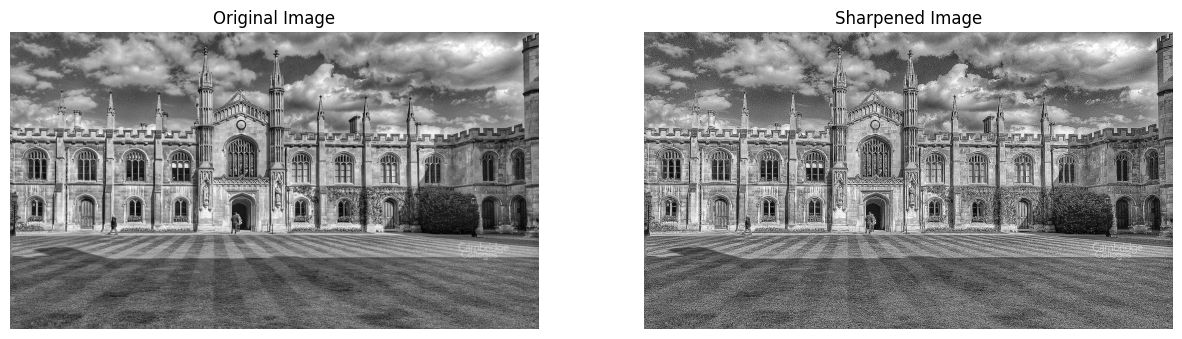

In [5]:


## Demo
# Apply a Sharpening Filter
sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

# Display Results
display_images([image, sharpened_image], ["Original Image", "Sharpened Image"])

## Exercise 2
# Task: Use a custom sharpening kernel to enhance the edges further
# Uncomment and modify the code below:
#custom_sharpen_kernel = np.array([[-1, -1, -1],
#                                   [-1, 9, -1],
#                                   [-1, -1, -1]])
#custom_sharpened = cv2.filter2D(image, -1, custom_sharpen_kernel)
#display_images([sharpened_image, custom_sharpened], ["Default Sharpen", "Custom Sharpen"])



# Section 3: Edge Detection Using Gradient-Based Operators

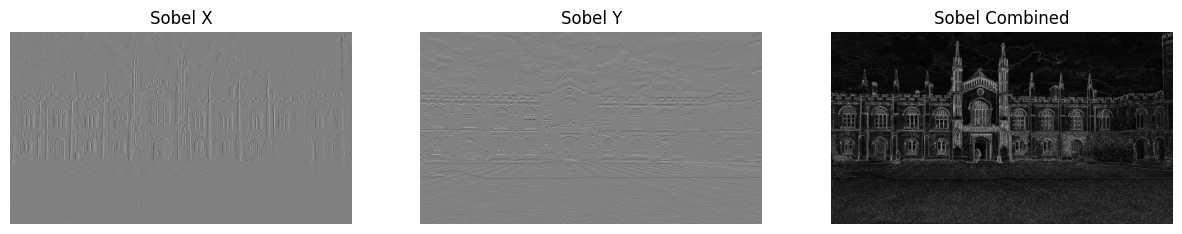

In [6]:


## Demo
# Sobel Operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display Results
display_images([sobel_x, sobel_y, sobel_combined], ["Sobel X", "Sobel Y", "Sobel Combined"])

## Exercise 3
# Task: Implement Prewitt and Kirsch Operators
# Uncomment and complete the code below:
#prewitt_x = cv2.filter2D(image, -1, np.array([[?, ?, ?], [?, ?, ?], [?, ?, ?]]))
#prewitt_y = cv2.filter2D(image, -1, np.array([[?, ?, ?], [?, ?, ?], [?, ?, ?]]))
#prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)
#display_images([prewitt_x, prewitt_y, prewitt_combined], ["Prewitt X", "Prewitt Y", "Prewitt Combined"])



# Section 4: Canny Edge Detection

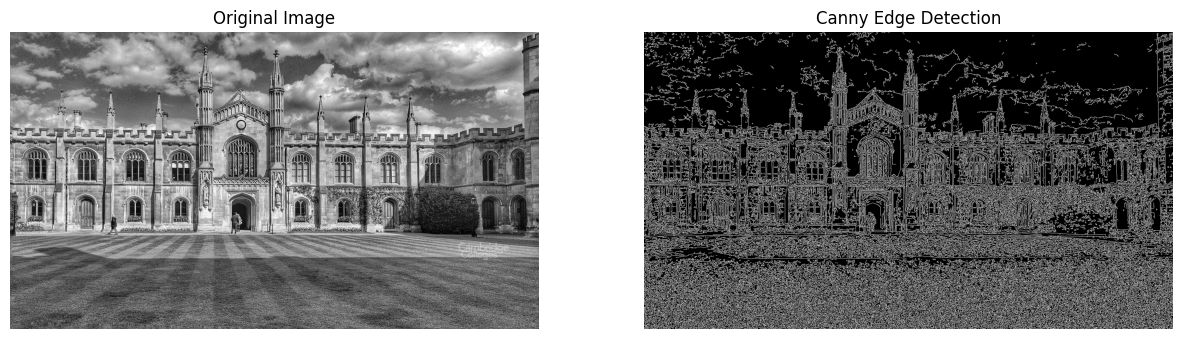

In [7]:


## Demo
canny_edges = cv2.Canny(image, 100, 200)

# Display Results
display_images([image, canny_edges], ["Original Image", "Canny Edge Detection"])

## Exercise 4
# Task: Experiment with different thresholds for Canny Edge Detection
# Uncomment and modify the code below:
#canny_edges_custom = cv2.Canny(image, ?, ?)
#display_images([canny_edges, canny_edges_custom], ["Default Canny", "Custom Canny"])

# Section 5: Hough Transform for Line Detection

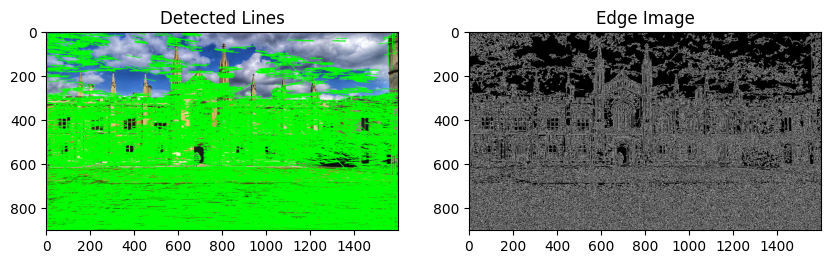

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
gitggggggggggfggggg
# Step 1: Load the image
image = cv2.imread('image.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Canny edge detection
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Step 4: Apply Hough Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Step 5: Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Step 6: Display the results
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Detected Lines')
plt.subplot(122), plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)), plt.title('Edge Image')
plt.show()


Reduce noise in the detected lines through Gaussian blur and improve the quality of the output via adjusting canny edge detection parameters

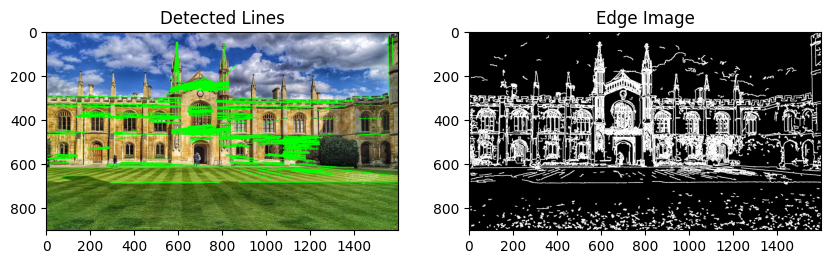

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('image.jpg')

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 4: Apply Canny edge detection with adjusted thresholds
edges = cv2.Canny(blurred_image, 100, 200, apertureSize=3)

# Optional: Apply morphological operations to clean up edges
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

# Step 5: Apply Hough Transform to detect lines with adjusted parameters
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=150, minLineLength=100, maxLineGap=10)

# Step 6: Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Step 7: Display the results
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Detected Lines')
plt.subplot(122), plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)), plt.title('Edge Image')
plt.show()


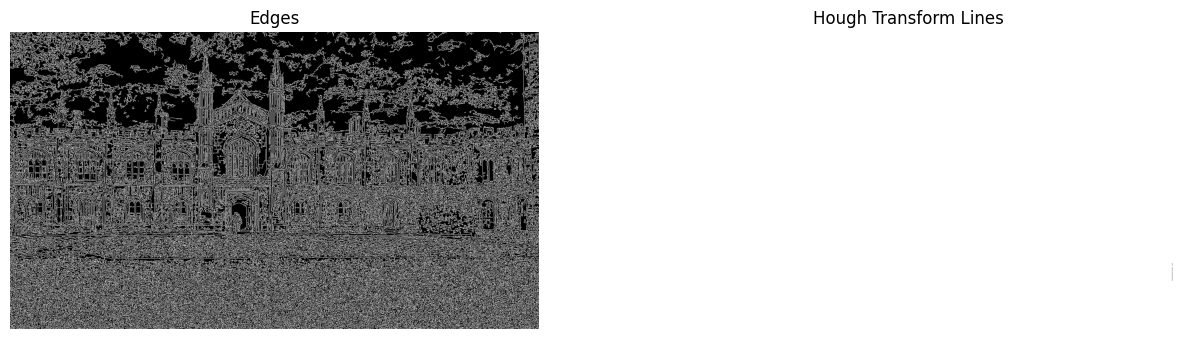

Processed image saved at: output.jpg


In [8]:


## Demo
# Detect edges using Canny first
edges = cv2.Canny(image, 50, 150)

# Apply Hough Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)
line_image = np.copy(image)

# Draw lines on the image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display Results
display_images([edges, line_image], ["Edges", "Hough Transform Lines"])

## Exercise 5
# Task: Experiment with different parameters for the Hough Transform
# Uncomment and modify the code below:
#lines_custom = cv2.HoughLines(edges, ?, ?, ?)
#custom_line_image = np.copy(image)
#if lines_custom is not None:
#    for rho, theta in lines_custom[:, 0]:
#        a = np.cos(theta)
#        b = np.sin(theta)
#        x0 = a * rho
#        y0 = b * rho
#        x1 = int(x0 + 1000 * (-b))
#        y1 = int(y0 + 1000 * (a))
#        x2 = int(x0 - 1000 * (-b))
#        y2 = int(y0 - 1000 * (a))
#        cv2.line(custom_line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
#display_images([line_image, custom_line_image], ["Default Hough", "Custom Hough"])


# Final Task: Build a Pipeline
# Combine the above techniques to build a simple edge and line detection pipeline for any input image.
output_image_path = "output.jpg"  # Replace with your path
cv2.imwrite(output_image_path, line_image)
print("Processed image saved at:", output_image_path)
